#### Imports e Definições

In [117]:
import pandas as pd
from copy import deepcopy           # Necessário para copiar os dados dentro de funções e evitar alterações inplace dos dados
                                    # Isso para que as funções recebam um dado e gerem um dado novo, mantendo o original inalterado.
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
DATA_PATH = 'dados/dados_treino.csv'

#### Funções Auxiliares

In [119]:
def bool_to_int(dataframe: pd.DataFrame) -> pd.DataFrame:
    '''
    
    Converte as colunas do tipo bool para o tipo int (0 e 1).
    
    '''
    columns = ['Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra', 'Tem_Instr_Cavaco', 
               'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano', 'Tem_Instr_Metais', 
               'Tem_Instr_Madeiras', 'Tem_Instr_Cordas', 'gostou']                      # Adicionar as colunas da bateria aqui depois
    new_df = deepcopy(dataframe)
    
    for col in columns:
        new_df[col] = new_df[col].astype(int)
        
    return new_df

def bateria_to_bool(dataframe: pd.DataFrame) -> pd.DataFrame:
    '''
    
    Transforma a coluna bateria para ser representada por binários
    Essa função pode ser modificada para processar a coluna bateria de formas distintas.
    
    '''
    new_df = deepcopy(dataframe)
    new_df['bateria_eletronica'] = (new_df['bateria'] == 'Eletrônica').astype(int)
    new_df['bateria_acustica']   = (new_df['bateria'] == 'Acústica').astype(int)
    new_df['bateria_nenhuma']     = (new_df['bateria'] == 'Nenhuma').astype(int)
    new_df = new_df.drop(columns = ['bateria'])
    
    return new_df

def get_user_data(USER: str, raw_data: pd.DataFrame) -> pd.DataFrame:
    user_data = raw_data[raw_data['id_cliente'] == USER]
    user_data = bool_to_int(user_data)
    user_data = bateria_to_bool(user_data)
    user_data['modo'] = user_data['modo'].fillna("K")
    
    return user_data

def preprocessing(raw_data: pd.DataFrame) -> pd.DataFrame:
    new_df = deepcopy(raw_data)
    new_df['PctCantada'] = new_df['PctCantada'] / 100
    new_df['PctRap'] = new_df['PctRap'] / 100
    new_df['duracao'] = new_df['duracao'] / (60*1000)
    new_df['modo'] = new_df['modo'].fillna('K').apply(lambda s: s.upper())
    new_df['VolMedio'] = raw_data['VolMedio'].abs()
    new_df['duracao']  = new_df['duracao'].abs()
    
    return new_df

In [120]:
columns = ['Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra', 'Tem_Instr_Cavaco', 
           'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano', 'Tem_Instr_Metais', 
           'Tem_Instr_Madeiras', 'Tem_Instr_Cordas'] 

***

__Olhando os dados por cima.__

In [121]:
raw_data = pd.read_csv(DATA_PATH)

In [122]:
raw_data.info()    # Informaçãões gerais do dataset. Permite ver se há valores NULL.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bateria                         4975 non-null   object 
 1   Tem_Instr_Violao_Viola          4975 non-null   bool   
 2   Tem_Instr_Guitarra              4975 non-null   bool   
 3   Tem_Instr_Cavaco                4975 non-null   bool   
 4   Tem_Instr_Sintetizador_Teclado  4975 non-null   bool   
 5   Tem_Instr_Piano                 4975 non-null   bool   
 6   Tem_Instr_Metais                4975 non-null   bool   
 7   Tem_Instr_Madeiras              4975 non-null   bool   
 8   Tem_Instr_Cordas                4975 non-null   bool   
 9   BPM                             4975 non-null   float64
 10  VolMedio                        4975 non-null   float64
 11  PctCantada                      4975 non-null   float64
 12  PctRap                          49

In [123]:
raw_data.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4975 entries, 0 to 4974
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bateria                         4975 non-null   object 
 1   Tem_Instr_Violao_Viola          4975 non-null   bool   
 2   Tem_Instr_Guitarra              4975 non-null   bool   
 3   Tem_Instr_Cavaco                4975 non-null   bool   
 4   Tem_Instr_Sintetizador_Teclado  4975 non-null   bool   
 5   Tem_Instr_Piano                 4975 non-null   bool   
 6   Tem_Instr_Metais                4975 non-null   bool   
 7   Tem_Instr_Madeiras              4975 non-null   bool   
 8   Tem_Instr_Cordas                4975 non-null   bool   
 9   BPM                             4975 non-null   float64
 10  VolMedio                        4975 non-null   float64
 11  PctCantada                      4975 non-null   float64
 12  PctRap                          49

In [124]:
raw_data.head()

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,modo,gostou,data_curtida,n_reproducao,id_cliente
0,Acústica,False,True,False,False,True,False,False,False,128.652946,-8.743969,38.671394,0.0,680510,1977,NaN,False,2021-07-29,5,#ID4940
1,Acústica,True,False,True,False,False,False,False,False,107.679121,-12.128194,75.739791,0.0,195746,2014,f,False,2021-07-29,5,#ID4940
2,Nenhuma,False,True,False,False,True,True,False,False,117.885751,-10.880246,35.978128,0.0,413618,1968,D#,False,2021-07-29,4,#ID4940
3,Acústica,False,True,False,False,True,True,True,False,119.309408,-12.489925,45.763376,0.0,749101,1963,D#,True,2021-07-29,3,#ID4940
4,Eletrônica,False,False,False,True,True,False,False,False,153.488568,-6.412484,58.979747,0.0,168978,2020,c,False,2021-07-29,2,#ID4940


In [125]:
raw_data['bateria'].value_counts()       # Contagem de quantos valores diferentes existem nessa coluna.

Acústica      3178
Eletrônica    1525
Nenhuma        272
Name: bateria, dtype: int64

In [126]:
raw_data['gostou'].value_counts()        # Verificar se o dataset está desbalanceado.

False    3760
True     1215
Name: gostou, dtype: int64

In [127]:
raw_data[raw_data['id_cliente'] == '#ID4940']['gostou'].value_counts()        # Verificar se o dataset está desbalanceado.

False    1712
True      860
Name: gostou, dtype: int64

In [128]:
raw_data[raw_data['id_cliente'] == '#ID9181']['gostou'].value_counts()        # Verificar se o dataset está desbalanceado.

False    2048
True      355
Name: gostou, dtype: int64

In [129]:
raw_data['id_cliente'].value_counts()    # Contagem de usuários distintos.

#ID4940    2572
#ID9181    2403
Name: id_cliente, dtype: int64

In [130]:
raw_data['data_curtida'].value_counts()  # Contagem de datas distintas.

2021-07-29    2572
2021-07-02    2403
Name: data_curtida, dtype: int64

In [131]:
raw_data[raw_data['data_curtida'] == '2021-07-29']['id_cliente'].value_counts()     # Verificar se as duas datas estão presentes nos dois usuários

#ID4940    2572
Name: id_cliente, dtype: int64

In [132]:
raw_data[raw_data['data_curtida'] == '2021-07-02']['id_cliente'].value_counts()     # Verificar se as duas datas estão presentes nos dois usuários

#ID9181    2403
Name: id_cliente, dtype: int64

In [133]:
raw_data['ano_lancamento'].value_counts() # Contagem de anos de lançamento distintos.

2021    582
2020    300
2019    258
2014    215
2016    214
       ... 
1899      1
1911      1
1919      1
1927      1
1926      1
Name: ano_lancamento, Length: 103, dtype: int64

In [134]:
raw_data['n_reproducao'].value_counts()    # Olhando por cima a variedade de número de repetições.

3     1309
2     1246
4      966
1      544
5      477
6      240
7      116
8       48
9       20
10       8
12       1
Name: n_reproducao, dtype: int64

#### Observações Sobre o Dataset

- A coluna "modo" admite valores NULL que precisarão ser tratados (i.e. mapeados em algum valor numérico).
- As colunas booleanas precisam ser mapeadas em inteiros (binários).
- A coluna "bateria" contém valores string e precisa ser representada numericamente. Duas alternativas:
    - one-hot-encoding: a coluna bateria é transformada em duas colunas binárias, "bateria eletrônica", "bateria acústica", com valor 1 se tem e valor 0 se não tem.
    - inteiro: cada valor é associado a um inteiro, p.ex. Nenhuma = 0, Eletrônica = 1, Acústica = 2. Não tenho certeza se essa representação gera algum problema ao modelo por "presumir" uma ordem das classes.
- A coluna "modo" também contém valores de string.
    - __Pesquisar sobre como representar adequadamente essas notas em vetores__
- A coluna "PctCantada" e "PctRap" podem ser normalizadas para \[0, 1\].
    - A coluna "PctRap" pode ser removida provavelmente.
- A coluna "duracao" parece estar em ms. Basta dividi-la por 60\*1000 para passar para minutos.
- A coluna de targets, "gostou", está desbalanceada. Na hora de gerar os conjuntos de treinamento, validação e teste, isso tem que ser feito de tal forma a manter equilibrado o número de amostras com "gostou = true" e "gostou = false".
    - Uma estratégia é selecionar apenas 1215 amostras com "gostou = false", então a base iteira teria 2430 amostras no total, e a particionaríamos nos 3 grupos tomando quantidades iguais de cada classe, i.e. de cada grupo, ~700 amostras de cada para treino, ~200 amostras para teste, ~315 amostras para validação. 
    - Uma segunda estratégia, mais sofisticada e portanto mais passível de não funcionar, é usar um algoritmo para equilibrar datasets como o SMOTE, que gera amostras em regiões próximas de um dado conjunto de dados para "preenchê-lo". Para isso precisaríamos já ter todo o dataset representado numericamente.
- A coluna "data_curtida" só tem duas datas, 2021-07-29 e 2021-07-02, cada qual associada a um ID, que também só tem dois. Ou seja, a informação da data parece irrelevante.
- Para fazer a análise, considerando que não podemos cruzar informações entre os usuários, devemos selecionar um dos usuários e conduzir a análise para ele. É bom que escrevamos todos os métodos, funções, etc. que utilizarmos como funções que possam ser aplicáveis a qualquer usuário, variando apenas o ID como parâmetro.
- A coluna com o número de reproduções da música parece ser bem útil para analisar o gosto do usuário. O que poderíamos fazer de útil com elas?
    - Treinar um regressor que vai aprender a mensurar o quanto um usuário vai gostar de uma música inferindo o número de vezes que ele a ouvirá.
    - Junto de um modelo classificador que julga se o usuário vai ou não gostar de uma música, temos já um sistema que decide, dado uma nova música, se ele gosta ou não e o quanto.

__Análise mais detalhada.__

#### Ideias para análise.

- Detectar, dado um usuário qualquer, quais atributos são mais relevantes para prever se ele gosta ou não, e o quanto.
    - Existem pacotes como o "Shape" que fazem isso, nunca usei mas não parece difícil.
    - Modelos de árvore de decisão, e modelos mais complexos baseados em árvores de decisão, como o XGBoost, permitem analisar diretamente quais os atributos foram mais relevantes no treinamento.
    
- Verificar se há discrepâncias nas proporções de cada instrumento dentro dos grupos "gostou" e "não gostou". Como exemplo, se a proporção de músicas com guitarra é muito maior no conjunto de músicas que o usuário gostou, este fator tem mais relevância para determinar o gosto do usuário.

In [135]:
raw_data = pd.read_csv(DATA_PATH)
raw_data = preprocessing(raw_data)

In [136]:
raw_data.head()

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,modo,gostou,data_curtida,n_reproducao,id_cliente
0,Acústica,False,True,False,False,True,False,False,False,128.652946,8.743969,0.386714,0.0,11.341833,1977,K,False,2021-07-29,5,#ID4940
1,Acústica,True,False,True,False,False,False,False,False,107.679121,12.128194,0.757398,0.0,3.262433,2014,F,False,2021-07-29,5,#ID4940
2,Nenhuma,False,True,False,False,True,True,False,False,117.885751,10.880246,0.359781,0.0,6.893633,1968,D#,False,2021-07-29,4,#ID4940
3,Acústica,False,True,False,False,True,True,True,False,119.309408,12.489925,0.457634,0.0,12.485017,1963,D#,True,2021-07-29,3,#ID4940
4,Eletrônica,False,False,False,True,True,False,False,False,153.488568,6.412484,0.589797,0.0,2.816300,2020,C,False,2021-07-29,2,#ID4940


Usuário 1 (ID: #ID9181)

In [137]:
USER = '#ID9181'
user_data = raw_data[raw_data['id_cliente'] == USER]

In [138]:
user_data = bool_to_int(user_data)
user_data = bateria_to_bool(user_data)
user_data['modo'] = user_data['modo'].fillna("K")
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

In [139]:
count = user_data[columns + ['gostou']].groupby('gostou').sum()
count.loc[0] = count.loc[0] / len(user_data_disliked)
count.loc[1] = count.loc[1] / len(user_data_liked)
count

,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas
gostou,,,,,,,,
0,0.485840,0.403809,0.171387,0.604004,0.395996,0.261719,0.067383,0.345703
1,0.473239,0.338028,0.202817,0.735211,0.419718,0.205634,0.095775,0.360563


In [140]:
count = user_data[['bateria_nenhuma', 'bateria_eletronica', 'bateria_acustica', 'gostou']].groupby('gostou').sum()
count.loc[0] = count.loc[0] / len(user_data_disliked)
count.loc[1] = count.loc[1] / len(user_data_liked)
count

,bateria_nenhuma,bateria_eletronica,bateria_acustica
gostou,,,
0,0.056641,0.291016,0.652344
1,0.042254,0.366197,0.591549


<AxesSubplot:>

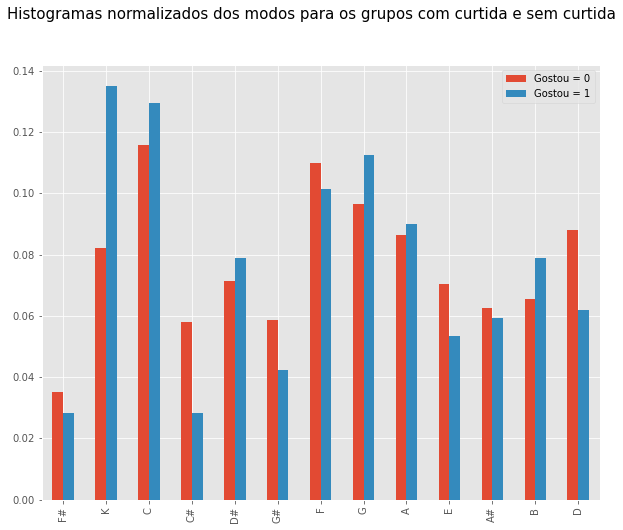

In [141]:
fig, axs = plt.subplots(figsize = (10, 8))

fig.suptitle("Histogramas normalizados dos modos para os grupos com curtida e sem curtida", fontsize = 15)

modes_disliked = {modo: (user_data_disliked['modo'] == modo).sum() / len(user_data_disliked) for modo in user_data['modo'].unique()}
modes_liked    = {modo: (user_data_liked['modo'] == modo).sum() / len(user_data_liked) for modo in user_data['modo'].unique()}
df = pd.DataFrame({"Gostou = 0": modes_disliked.values(), "Gostou = 1": modes_liked.values()}, index = user_data['modo'].unique())

df.plot(kind = 'bar', ax = axs)
# axs[0].bar(modes_disliked.keys(), modes_disliked.values())
# axs[1].bar(modes_liked.keys(), modes_liked.values())

A área da curva é menor pela diferença de amostras em cada grupo, mas aqui é interessante olhar para a diferença nos pontos de máximo e mínimo local. Por exemplo, o grupo "gostou = 0" tem um máximo perto do 100 que o grupo "gostou = 1" não possui, tendo seu segundo máximo mais abaixo. O máximo global de ambos é mais ou menos próximo (perto de 120 aparentemente), mas o grupo "Gostou = 1" tem maior probabilidade para valores mais altos, indicando a preferência do usuário por ritmos mais acelerados.

Text(0.5, 0.98, 'Curva de Densidade de Probabilidade do BMP')

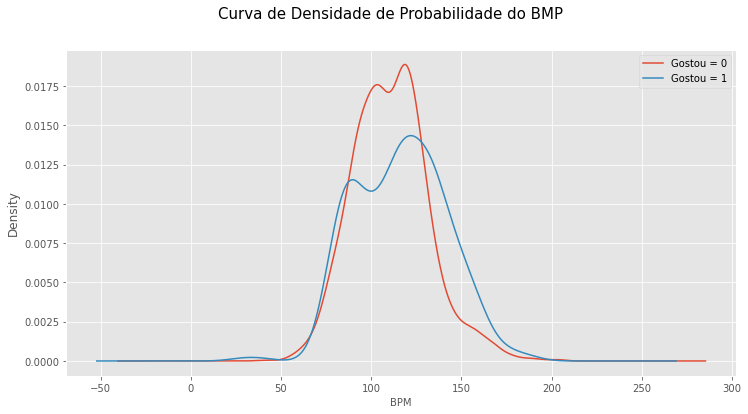

In [142]:
fig, ax = plt.subplots(figsize = (12, 6))

user_data_disliked['BPM'].plot.density(ax = ax, label = 'Gostou = 0')
user_data_liked['BPM'].plot.density(ax = ax, label = 'Gostou = 1')

ax.legend()

ax.set_xlabel("BPM", fontsize = 10)
fig.suptitle("Curva de Densidade de Probabilidade do BMP", fontsize = 15)

Os picos estão próximos, mas o grupo "Gostou = 1" tem uma probabilidade maior para valores menores (como interpretar esses valores eu não faço ideia). A distribuição do grupo "Gostou = 0" está mais concentrada.

Text(0.5, 0.98, 'Curva de Densidade de Probabilidade do Volume Médio')

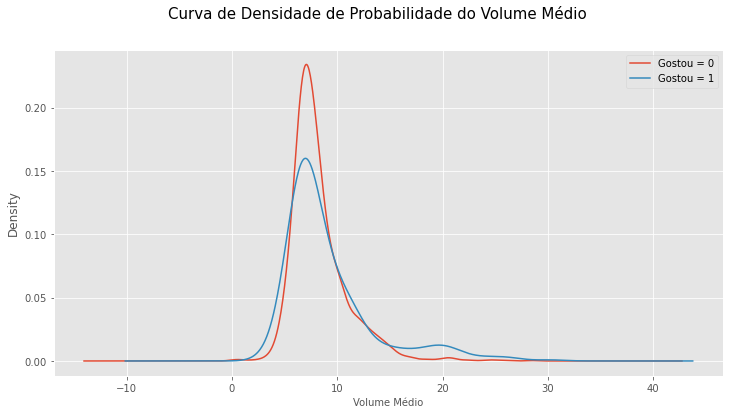

In [143]:
fig, ax = plt.subplots(figsize = (12, 6))

user_data_disliked['VolMedio'].plot.density(ax = ax, label = 'Gostou = 0')
user_data_liked['VolMedio'].plot.density(ax = ax, label = 'Gostou = 1')

ax.legend()

ax.set_xlabel("Volume Médio", fontsize = 10)
fig.suptitle("Curva de Densidade de Probabilidade do Volume Médio", fontsize = 15)

A distribuição ads durações é pouco informativa.

Text(0.5, 0.98, 'Curva de Densidade de Probabilidade da Duração')

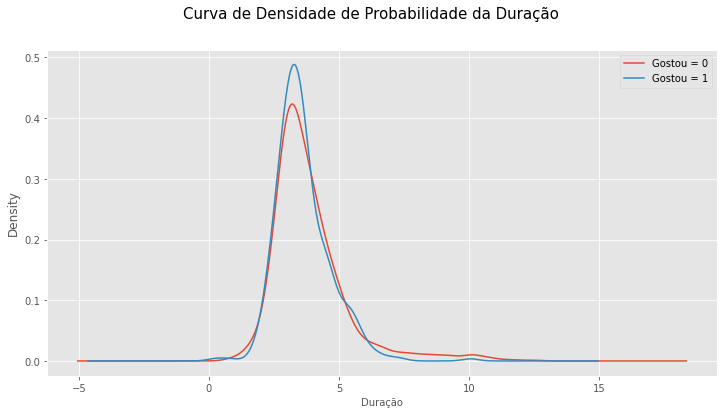

In [144]:
fig, ax = plt.subplots(figsize = (12, 6))

user_data_disliked['duracao'].plot.density(ax = ax, label = 'Gostou = 0')
user_data_liked['duracao'].plot.density(ax = ax, label = 'Gostou = 1')

ax.legend()

ax.set_xlabel("Duração", fontsize = 10)
fig.suptitle("Curva de Densidade de Probabilidade da Duração", fontsize = 15)

In [145]:
user_data_liked['PctCantada'].min()

0.0

As probabilidades negativas decorrem da forma como a curva de densidade é gerada, por aproximação de uma função em torno de um ponto. Como tem uma concentração de músicas com PctCantada = 0, aparece aquele pico. 

Essa curva é mais informativa, indicando que o usuário gosta de música instrumentais (PctCantada = 0). De modo geral a curva de distribuição do grupo "Gostou = 1" está mais para a esquerda enquanto a do grupo "Gostou = 0" está mais para a direita, indicando preferência por instrumental.

Text(0.5, 0.98, 'Curva de Densidade de Probabilidade para %Cantada')

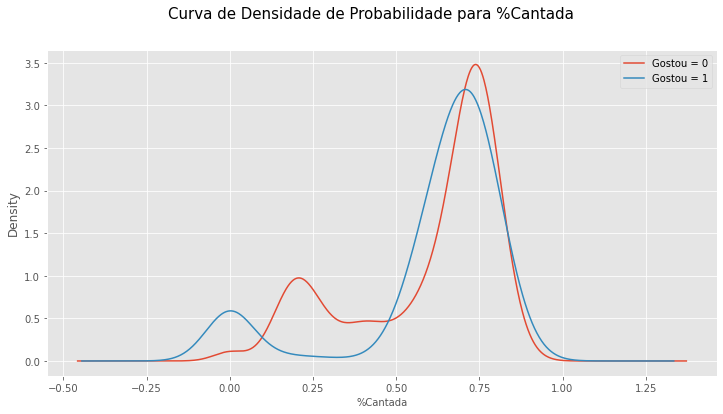

In [146]:
fig, ax = plt.subplots(figsize = (12, 6))

user_data_disliked['PctCantada'].plot.density(ax = ax, label = 'Gostou = 0')
user_data_liked['PctCantada'].plot.density(ax = ax, label = 'Gostou = 1')

ax.legend()

ax.set_xlabel("%Cantada", fontsize = 10)
fig.suptitle("Curva de Densidade de Probabilidade para %Cantada", fontsize = 15)

Como esperado, a maioria das amostras tem porcentagem de rap nula. Porém, dá para notar algumas diferenças que talvez ajudem um modelo a aprender as preferências do usuário. A probabilidade do usuário não gostar de uma música com rap é visivelmente maior.

Text(0.5, 0.98, 'Curva de Densidade de Probabilidade do %Rap')

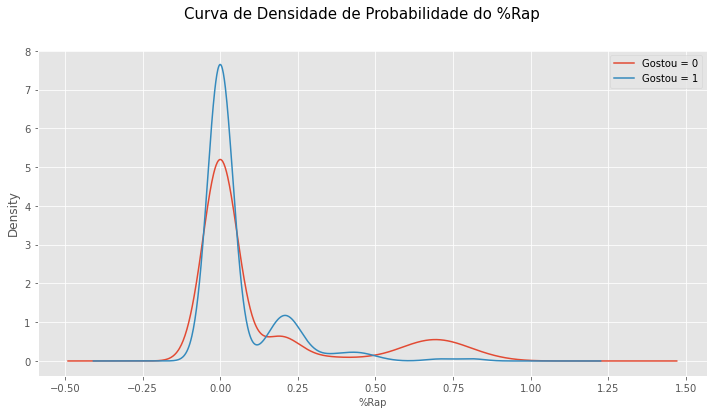

In [147]:
fig, ax = plt.subplots(figsize = (12, 6))

user_data_disliked['PctRap'].plot.density(ax = ax, label = 'Gostou = 0')
user_data_liked['PctRap'].plot.density(ax = ax, label = 'Gostou = 1')

ax.legend()

ax.set_xlabel("%Rap", fontsize = 10)
fig.suptitle("Curva de Densidade de Probabilidade do %Rap", fontsize = 15)

Text(0.5, 0, 'Ano')

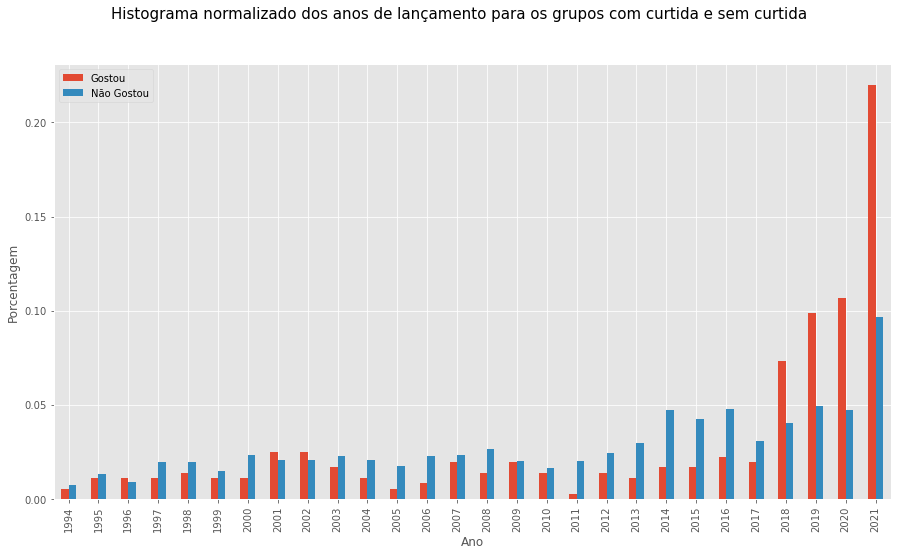

In [148]:
fig, ax = plt.subplots(figsize = (15, 8))

fig.suptitle("Histograma normalizado dos anos de lançamento para os grupos com curtida e sem curtida", fontsize = 15)

ano_disliked = {ano: (user_data_disliked['ano_lancamento'] == ano).sum() / len(user_data_disliked) for ano in user_data['ano_lancamento'].unique()}
ano_liked    = {ano: (user_data_liked['ano_lancamento'] == ano).sum() / len(user_data_liked) for ano in user_data['ano_lancamento'].unique()}
anos_df = pd.DataFrame({'Gostou': ano_liked.values(), 'Não Gostou': ano_disliked.values()}, index = ano_liked.keys())
anos_df = anos_df.sort_index()
anos_df = anos_df.iloc[70:]

anos_df.plot(kind = 'bar', ax = ax)

ax.set_ylabel("Porcentagem", fontsize = 12)
ax.set_xlabel("Ano", fontsize = 12)

O número de reproduções já é um critério bom para decidir se o usuário vai ou não curtir uma música, já que para n > 4 reproduções, a probabilidade de ter gostado é sempre maior.

Text(0.5, 0, 'Número de Reproduções')

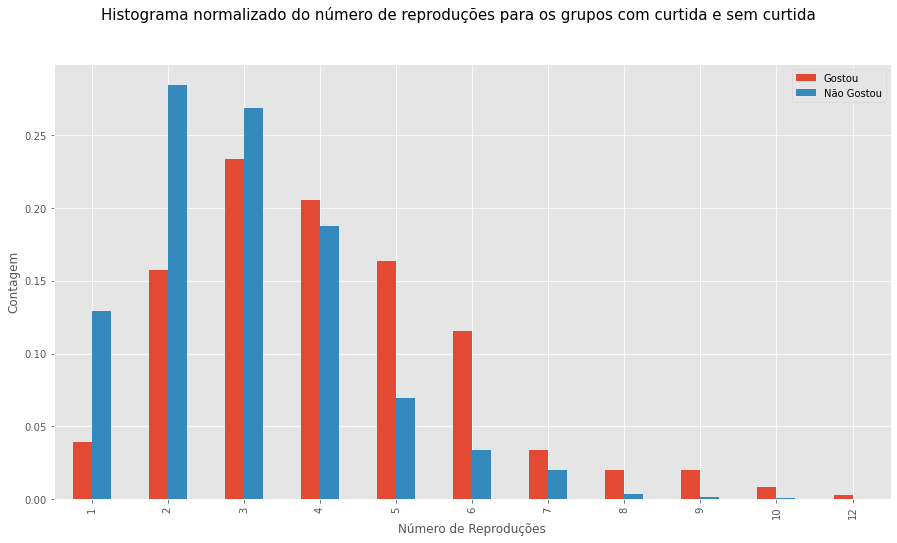

In [149]:
fig, ax = plt.subplots(figsize = (15, 8))

fig.suptitle("Histograma normalizado do número de reproduções para os grupos com curtida e sem curtida", fontsize = 15)

reproducao_disliked = {n: (user_data_disliked['n_reproducao'] == n).sum() / len(user_data_disliked) for n in user_data['n_reproducao'].unique()}
reproducao_liked    = {n: (user_data_liked['n_reproducao'] == n).sum() / len(user_data_liked) for n in user_data['n_reproducao'].unique()}
reproducao_df = pd.DataFrame({'Gostou': reproducao_liked.values(), 'Não Gostou': reproducao_disliked.values()}, index = reproducao_liked)
reproducao_df = reproducao_df.sort_index()

reproducao_df.plot(kind = 'bar', ax = ax)

ax.set_ylabel("Contagem", fontsize = 12)
ax.set_xlabel("Número de Reproduções", fontsize = 12)

Usuário 2 (ID: #ID4940)

In [150]:
USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

Text(0.5, 1.0, '#ID4940')

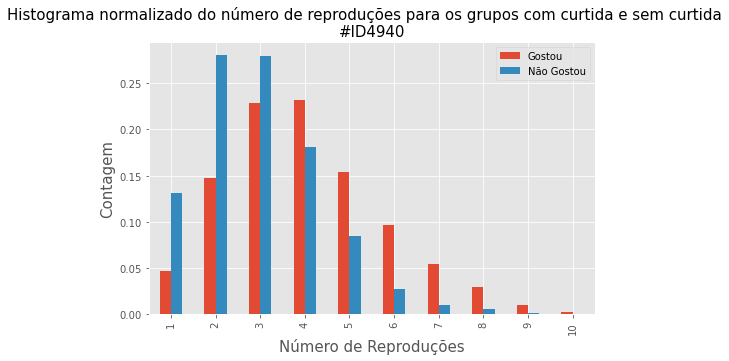

In [151]:
fig, ax = plt.subplots(figsize = (8, 5))

fig.suptitle("Histograma normalizado do número de reproduções para os grupos com curtida e sem curtida", fontsize = 15)

reproducao_disliked = {n: (user_data_disliked['n_reproducao'] == n).sum() / len(user_data_disliked) for n in user_data['n_reproducao'].unique()}
reproducao_liked    = {n: (user_data_liked['n_reproducao'] == n).sum() / len(user_data_liked) for n in user_data['n_reproducao'].unique()}
reproducao_df = pd.DataFrame({'Gostou': reproducao_liked.values(), 'Não Gostou': reproducao_disliked.values()}, index = reproducao_liked)
reproducao_df = reproducao_df.sort_index()

reproducao_df.plot(kind = 'bar', ax = ax)

ax.set_ylabel("Contagem", fontsize = 15)
ax.set_xlabel("Número de Reproduções", fontsize = 15)
ax.set_title(f"{USER}", fontsize = 15)

In [152]:
count = user_data[columns + ['gostou']].groupby('gostou').sum()
count.loc[0] = count.loc[0] / len(user_data_disliked)
count.loc[1] = count.loc[1] / len(user_data_liked)
count

,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas
gostou,,,,,,,,
0,0.460280,0.382009,0.168224,0.667056,0.41764,0.242407,0.070678,0.379673
1,0.512791,0.397674,0.169767,0.562791,0.39186,0.265116,0.066279,0.329070


In [153]:
count = user_data[['bateria_nenhuma', 'bateria_eletronica', 'bateria_acustica', 'gostou']].groupby('gostou').sum()
count.loc[0] = count.loc[0] / len(user_data_disliked)
count.loc[1] = count.loc[1] / len(user_data_liked)
count

,bateria_nenhuma,bateria_eletronica,bateria_acustica
gostou,,,
0,0.060164,0.346379,0.593458
1,0.044186,0.239535,0.716279


#### Ideias para o sistema de recomendação.

- Uma primeira parte é treinar um modelo que seja capaz de julgar se um usuário vai ou não gostar de uma música, e o quanto. Com isso, dada uma lista qualquer de músicas, esse modelo poderia selecionar aquelas com maior probabilidade de aprovação e ordená-las pelo quanto ela o agradaria. Ficaria faltando então um sistema para selecionar essas amostras de música.

- Uma segunda parte (acredito que dê para fazer mas pode fugir do escopo) é criar um sistema que produza uma lista de músicas para ser avaliada, filtrada e então recomendada para o usuário. 
    - Estratégia 1:
            - 1. Treinar um modelo generativo nas amostras com "gostou = True" (talvez vamos precisar montar um segundo grupo de conjuntos de treino e validação). O modelo vai captar os padrões de gosto do usuário e com ele podemos fazer amostragem para gerar novos exemplos.
            - 2. Tendo separado um conjunto de músicas que vai imitar uma base de dados de músicas, medimos a distância de cada amostra gerada pelo modelo anterior com os exemplos desse conjunto, e escolhemos o exemplo real mais próximo. Isso pode ser feito por distância euclidiana, distância angular. Com isso temos um sistema que escolhe da base de dados amostras para sugerir.
            - 3. Tendo escolhido N amostras (um número razoavelmente grande), usamos o modelo classificador/regressor para decidir quais o usuário vai gostar, e ordenar pelo grau de preferência.
            - 4. Escolhemos as M < N amostras que o usuário poderia gostar mais para fazer a recomendação.
        - Comentários: Na parte 1, de treinar o modelo generativo, se tivermos um método capaz de selecionar os atributos mais relevantes para determinar o gosto do usuário 

### Testes estatísticos

Kolmogorov-Smirnov para diferenças de distribuições

In [154]:
from scipy.stats import ks_2samp

In [155]:
USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

_, p_volmedio = ks_2samp(user_data_liked['VolMedio'], user_data_disliked['VolMedio'])
_, p_duracao = ks_2samp(user_data_liked['duracao'], user_data_disliked['duracao'])
_, p_pctcantada = ks_2samp(user_data_liked['PctCantada'], user_data_disliked['PctCantada'])
_, p_pctrap = ks_2samp(user_data_liked['PctRap'], user_data_disliked['PctRap'])

print(p_volmedio, p_duracao, p_pctcantada, p_pctrap)

2.8927729791572432e-05 0.14749043306051846 0.012339867919237357 0.3751788599972977


In [156]:
USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

_, p_volmedio = ks_2samp(user_data_liked['VolMedio'], user_data_disliked['VolMedio'])
_, p_duracao = ks_2samp(user_data_liked['duracao'], user_data_disliked['duracao'])
_, p_pctcantada = ks_2samp(user_data_liked['PctCantada'], user_data_disliked['PctCantada'])
_, p_pctrap = ks_2samp(user_data_liked['PctRap'], user_data_disliked['PctRap'])

print(p_volmedio, p_duracao, p_pctcantada, p_pctrap)

2.8927729791572432e-05 0.14749043306051846 0.012339867919237357 0.3751788599972977


In [157]:
USER = '#ID9181'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

_, p_volmedio = ks_2samp(user_data_liked['VolMedio'], user_data_disliked['VolMedio'])
_, p_duracao = ks_2samp(user_data_liked['duracao'], user_data_disliked['duracao'])
_, p_pctcantada = ks_2samp(user_data_liked['PctCantada'], user_data_disliked['PctCantada'])
_, p_pctrap = ks_2samp(user_data_liked['PctRap'], user_data_disliked['PctRap'])

print(p_volmedio, p_duracao, p_pctcantada, p_pctrap)

0.01497403435586897 0.012845075500179326 9.798355657175684e-06 9.991132417175308e-06


### Plots para o Relatório

In [158]:
plt.style.use('ggplot')

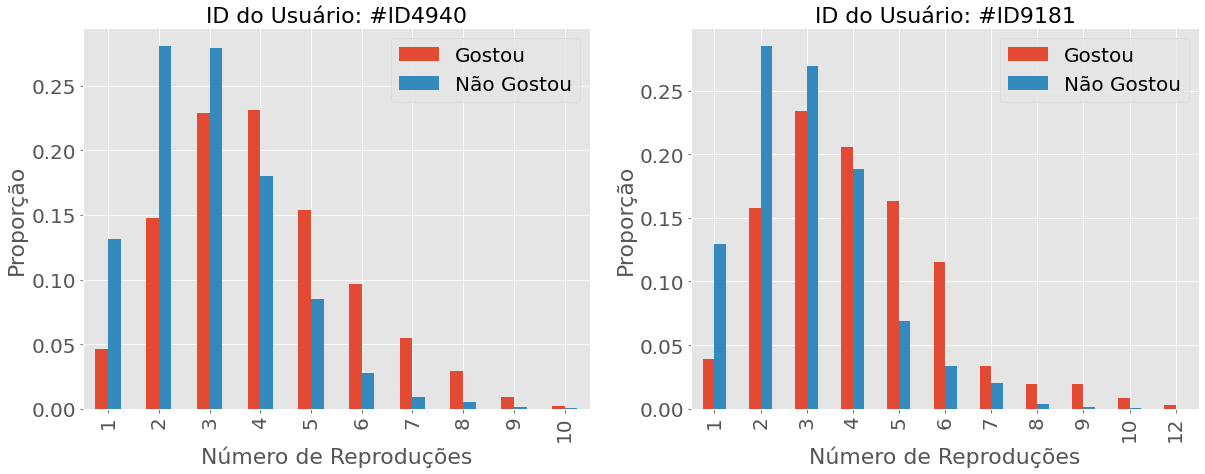

In [159]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 7))

# fig.suptitle("Histograma normalizado do número de reproduções para os grupos com curtida e sem curtida", fontsize = 15)
fig.subplots_adjust(wspace = 0.2)

USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

reproducao_disliked = {n: (user_data_disliked['n_reproducao'] == n).sum() / len(user_data_disliked) for n in user_data['n_reproducao'].unique()}
reproducao_liked    = {n: (user_data_liked['n_reproducao'] == n).sum() / len(user_data_liked) for n in user_data['n_reproducao'].unique()}
reproducao_df = pd.DataFrame({'Gostou': reproducao_liked.values(), 'Não Gostou': reproducao_disliked.values()}, index = reproducao_liked)
reproducao_df = reproducao_df.sort_index()

reproducao_df.plot(kind = 'bar', ax = ax[0])

ax[0].set_ylabel("Proporção", fontsize = 22)
ax[0].set_xlabel("Número de Reproduções", fontsize = 22)
ax[0].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[0].legend(prop = {'size': 20})
ax[0].tick_params(axis='both', which='major', labelsize=20)

USER = '#ID9181'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

reproducao_disliked = {n: (user_data_disliked['n_reproducao'] == n).sum() / len(user_data_disliked) for n in user_data['n_reproducao'].unique()}
reproducao_liked    = {n: (user_data_liked['n_reproducao'] == n).sum() / len(user_data_liked) for n in user_data['n_reproducao'].unique()}
reproducao_df = pd.DataFrame({'Gostou': reproducao_liked.values(), 'Não Gostou': reproducao_disliked.values()}, index = reproducao_liked)
reproducao_df = reproducao_df.sort_index()

reproducao_df.plot(kind = 'bar', ax = ax[1])

ax[1].set_ylabel("Proporção", fontsize = 22)
ax[1].set_xlabel("Número de Reproduções", fontsize = 22)
ax[1].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[1].legend(prop = {'size': 20})
ax[1].tick_params(axis='both', which='major', labelsize=20)

fig.savefig("Figuras/hist_n_reproducao.png", bbox_inches = 'tight')

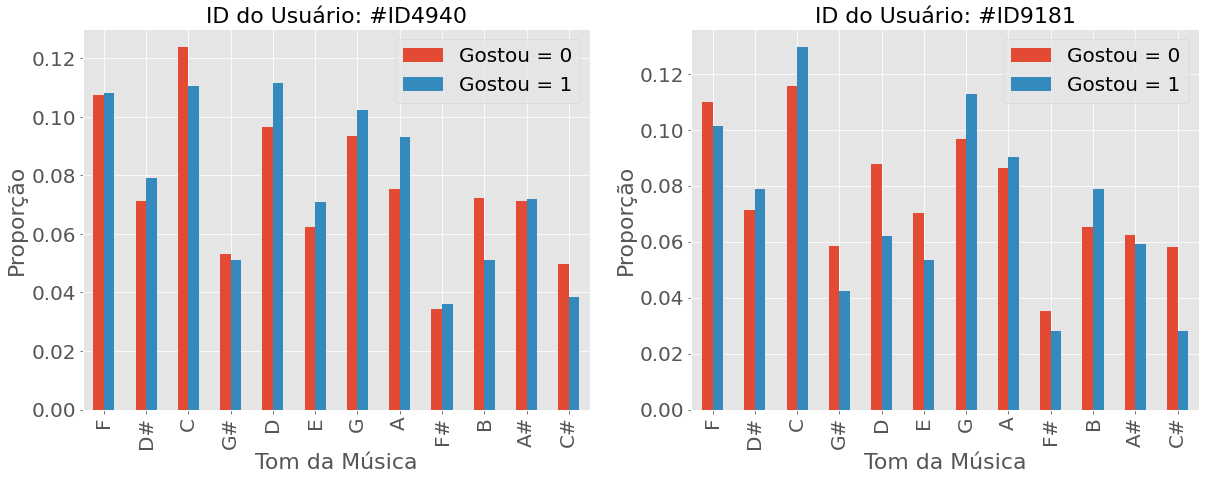

In [160]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 7))
fig.subplots_adjust(wspace = 0.2)

USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

modos = user_data['modo'].unique()

modes_disliked = {modo: (user_data_disliked['modo'] == modo).sum() / len(user_data_disliked) for modo in modos}
modes_liked    = {modo: (user_data_liked['modo'] == modo).sum() / len(user_data_liked) for modo in modos}
df = pd.DataFrame({"Gostou = 0": modes_disliked.values(), "Gostou = 1": modes_liked.values()}, index = modos).drop('K')

df.plot(kind = 'bar', ax = ax[0])

ax[0].set_ylabel("Proporção", fontsize = 22)
ax[0].set_xlabel("Tom da Música", fontsize = 22)
ax[0].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[0].legend(prop = {'size': 20})
ax[0].tick_params(axis='both', which='major', labelsize=20)

USER = '#ID9181'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

modes_disliked = {modo: (user_data_disliked['modo'] == modo).sum() / len(user_data_disliked) for modo in modos}
modes_liked    = {modo: (user_data_liked['modo'] == modo).sum() / len(user_data_liked) for modo in modos}
df = pd.DataFrame({"Gostou = 0": modes_disliked.values(), "Gostou = 1": modes_liked.values()}, index = modos).drop('K')

df.plot(kind = 'bar', ax = ax[1])

ax[1].set_ylabel("Proporção", fontsize = 22)
ax[1].set_xlabel("Tom da Música", fontsize = 22)
ax[1].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[1].legend(prop = {'size': 20})
ax[1].tick_params(axis='both', which='major', labelsize=20)

fig.savefig("Figuras/hist_tom_da_musica.png", bbox_inches = 'tight')

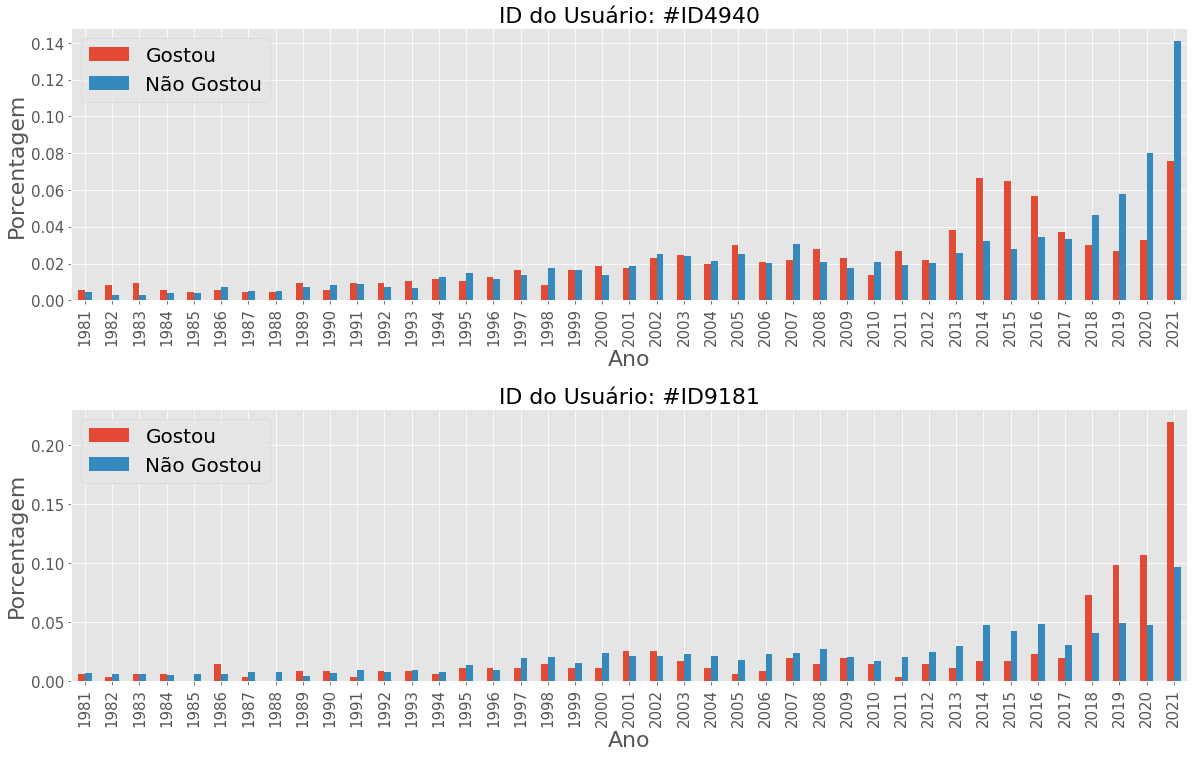

In [161]:
fig, ax = plt.subplots(nrows = 2, figsize = (20, 12))
fig.subplots_adjust(hspace = 0.4)

# fig.suptitle("Histograma normalizado dos anos de lançamento para os grupos com curtida e sem curtida", fontsize = 15)

USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

anos = user_data['ano_lancamento'].unique()

ano_disliked = {ano: (user_data_disliked['ano_lancamento'] == ano).sum() / len(user_data_disliked) for ano in anos}
ano_liked    = {ano: (user_data_liked['ano_lancamento'] == ano).sum() / len(user_data_liked) for ano in anos}
anos_df = pd.DataFrame({'Gostou': ano_liked.values(), 'Não Gostou': ano_disliked.values()}, index = ano_liked.keys())
anos_df = anos_df.sort_index()
anos_df = anos_df[anos_df.index > 1980]

anos_df.plot(kind = 'bar', ax = ax[0])

ax[0].set_ylabel("Porcentagem", fontsize = 22)
ax[0].set_xlabel("Ano", fontsize = 22)
ax[0].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[0].legend(prop = {'size': 20})
ax[0].tick_params(axis='both', which='major', labelsize=15)

USER = '#ID9181'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

anos = user_data['ano_lancamento'].unique()

ano_disliked = {ano: (user_data_disliked['ano_lancamento'] == ano).sum() / len(user_data_disliked) for ano in anos}
ano_liked    = {ano: (user_data_liked['ano_lancamento'] == ano).sum() / len(user_data_liked) for ano in anos}
anos_df = pd.DataFrame({'Gostou': ano_liked.values(), 'Não Gostou': ano_disliked.values()}, index = ano_liked.keys())
anos_df = anos_df.sort_index()
anos_df = anos_df[anos_df.index > 1980]

anos_df.plot(kind = 'bar', ax = ax[1])

ax[1].set_ylabel("Porcentagem", fontsize = 22)
ax[1].set_xlabel("Ano", fontsize = 22)
ax[1].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[1].legend(prop = {'size': 20})
ax[1].tick_params(axis='both', which='major', labelsize=15)

fig.savefig("Figuras/hist_ano_lancamento.png", bbox_inches = 'tight')

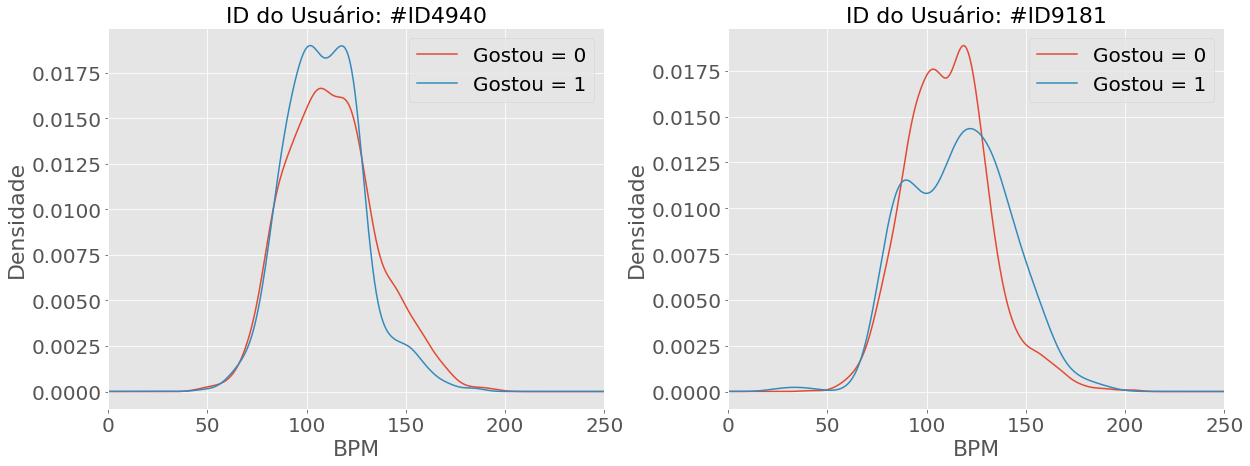

In [162]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 7))
fig.subplots_adjust(wspace = 0.25)

USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

user_data_disliked['BPM'].plot.density(ax = ax[0], label = 'Gostou = 0')
user_data_liked['BPM'].plot.density(ax = ax[0], label = 'Gostou = 1')
# ax[1].axvline(x = 88, color = 'b', alpha = 0.5)
# ax[1].axvline(x = 122, color = 'b', alpha = 0.5)

ax[0].legend()

ax[0].set_xlabel("BPM", fontsize = 22)
ax[0].set_ylabel("Densidade", fontsize = 22)
ax[0].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[0].legend(prop = {'size': 20})
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].set_xlim([0, 250])

USER = '#ID9181'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

user_data_disliked['BPM'].plot.density(ax = ax[1], label = 'Gostou = 0')
user_data_liked['BPM'].plot.density(ax = ax[1], label = 'Gostou = 1')
# ax[1].axvline(x = 102, color = 'r', alpha = 0.5)
# ax[1].axvline(x = 119, color = 'r', alpha = 0.5)

ax[1].legend()

ax[1].set_xlabel("BPM", fontsize = 22)
ax[1].set_ylabel("Densidade", fontsize = 22)
ax[1].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[1].legend(prop = {'size': 20})
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].set_xlim([0, 250])

fig.savefig("Figuras/densidade_bpm.png", bbox_inches = 'tight')

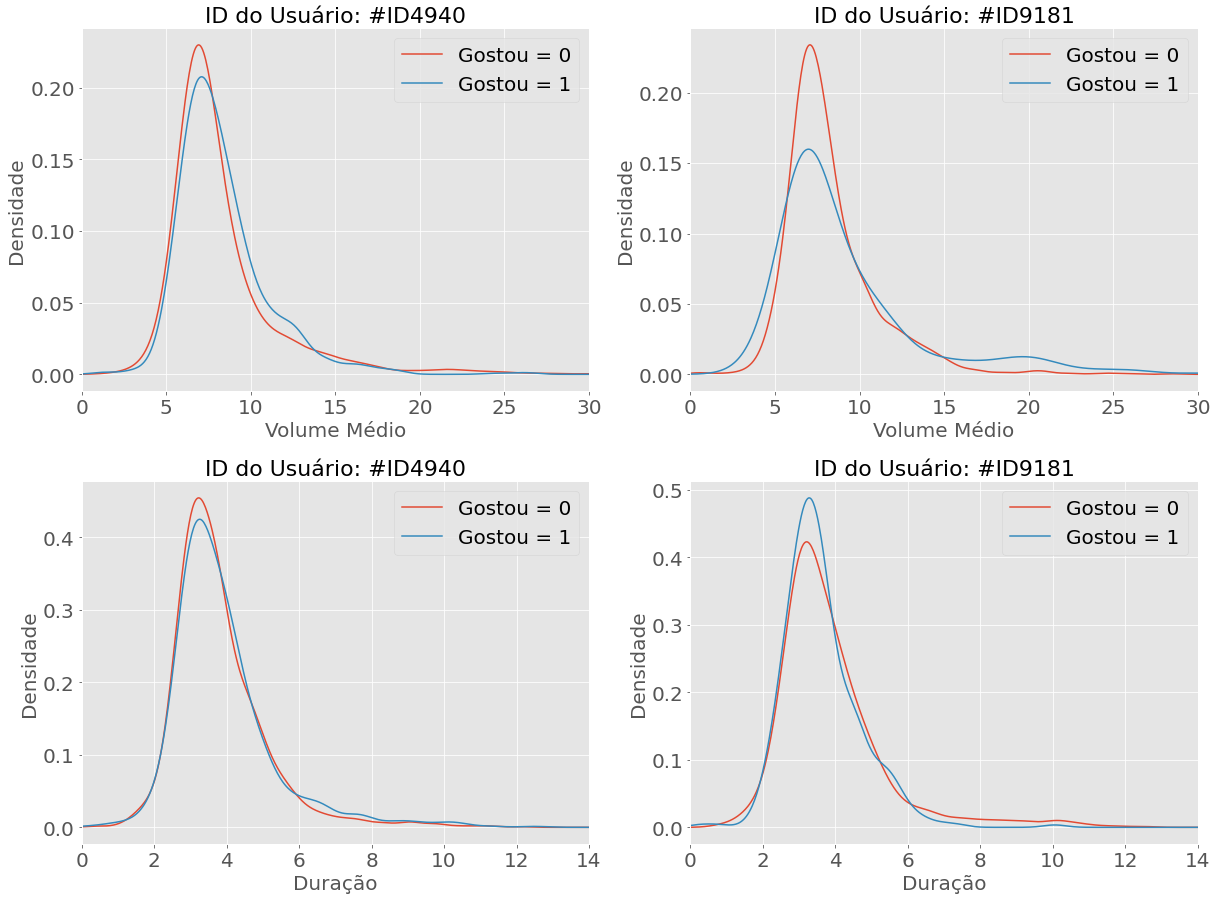

In [163]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (20, 15))
fig.subplots_adjust(wspace = 0.2, hspace = 0.25)

USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

user_data_disliked['VolMedio'].abs().plot.density(ax = ax[0][0], label = 'Gostou = 0')
user_data_liked['VolMedio'].abs().plot.density(ax = ax[0][0], label = 'Gostou = 1')

ax[0][0].legend()
ax[0][0].set_xlabel("Volume Médio", fontsize = 20)
ax[0][0].set_ylabel("Densidade", fontsize = 20)
ax[0][0].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[0][0].tick_params(axis='both', which='major', labelsize=20)
ax[0][0].legend(prop = {'size': 20})
ax[0][0].set_xlim([0, 30])

USER = '#ID9181'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

user_data_disliked['VolMedio'].abs().plot.density(ax = ax[0][1], label = 'Gostou = 0')
user_data_liked['VolMedio'].abs().plot.density(ax = ax[0][1], label = 'Gostou = 1')

ax[0][1].legend()
ax[0][1].set_xlabel("Volume Médio", fontsize = 20)
ax[0][1].set_ylabel("Densidade", fontsize = 20)
ax[0][1].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[0][1].tick_params(axis='both', which='major', labelsize=20)
ax[0][1].legend(prop = {'size': 20})
ax[0][1].set_xlim([0, 30])

###

USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

user_data_disliked['duracao'].plot.density(ax = ax[1][0], label = 'Gostou = 0')
user_data_liked['duracao'].plot.density(ax = ax[1][0], label = 'Gostou = 1')

ax[1][0].legend()
ax[1][0].set_xlabel("Duração", fontsize = 20)
ax[1][0].set_ylabel("Densidade", fontsize = 20)
ax[1][0].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[1][0].tick_params(axis='both', which='major', labelsize=20)
ax[1][0].legend(prop = {'size': 20})
ax[1][0].set_xlim([0, 14])

USER = '#ID9181'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

user_data_disliked['duracao'].plot.density(ax = ax[1][1], label = 'Gostou = 0')
user_data_liked['duracao'].plot.density(ax = ax[1][1], label = 'Gostou = 1')

ax[1][1].legend()
ax[1][1].set_xlabel("Duração", fontsize = 20)
ax[1][1].set_ylabel("Densidade", fontsize = 20)
ax[1][1].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[1][1].tick_params(axis='both', which='major', labelsize=20)
ax[1][1].legend(prop = {'size': 20})
ax[1][1].set_xlim([0, 14])

fig.savefig("Figuras/densidade_volume_duracao.png", bbox_inches = 'tight')

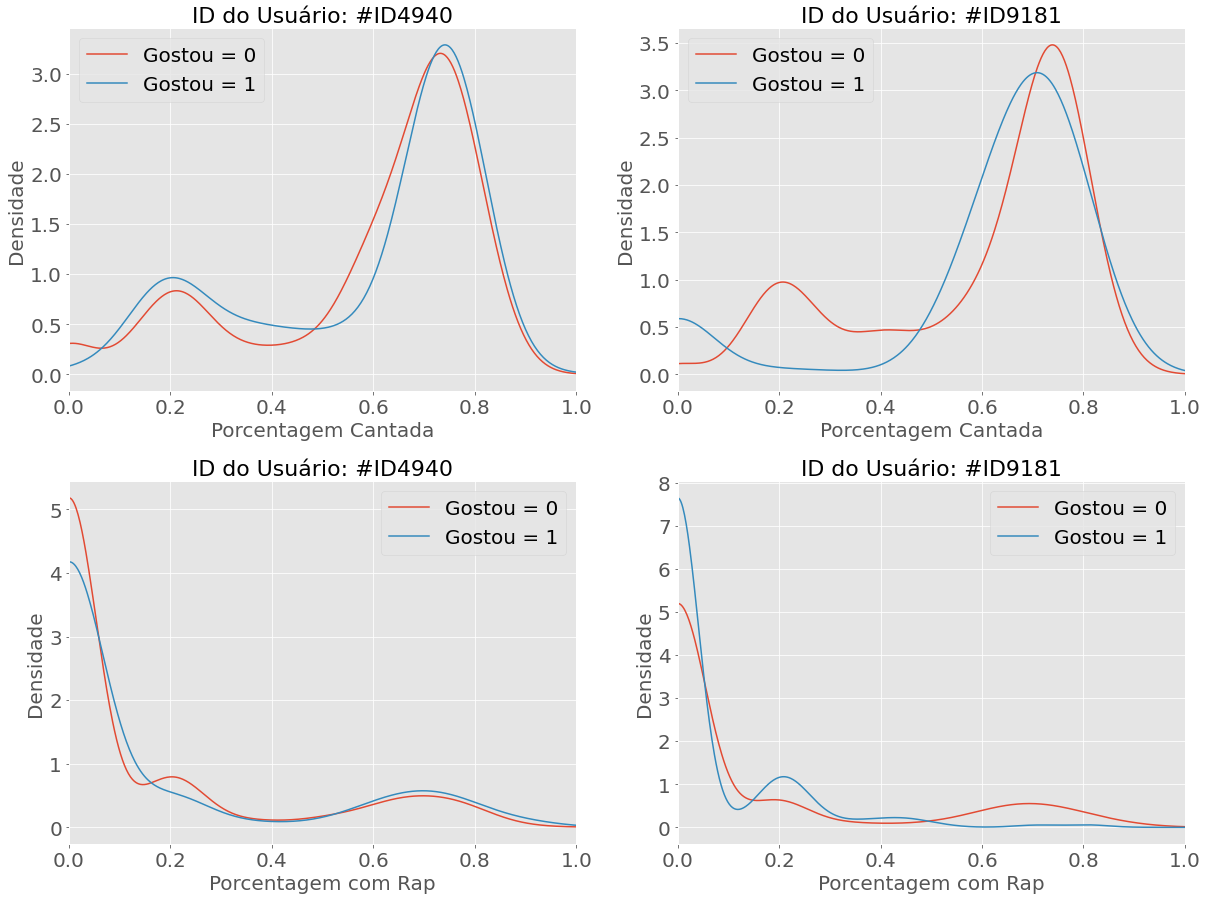

In [164]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (20, 15))
fig.subplots_adjust(wspace = 0.2, hspace = 0.25)

USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

user_data_disliked['PctCantada'].abs().plot.density(ax = ax[0][0], label = 'Gostou = 0')
user_data_liked['PctCantada'].abs().plot.density(ax = ax[0][0], label = 'Gostou = 1')

ax[0][0].legend()
ax[0][0].set_xlabel("Porcentagem Cantada", fontsize = 20)
ax[0][0].set_ylabel("Densidade", fontsize = 20)
ax[0][0].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[0][0].tick_params(axis='both', which='major', labelsize=20)
ax[0][0].legend(prop = {'size': 20})
ax[0][0].set_xlim([0, 1])

USER = '#ID9181'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

user_data_disliked['PctCantada'].abs().plot.density(ax = ax[0][1], label = 'Gostou = 0')
user_data_liked['PctCantada'].abs().plot.density(ax = ax[0][1], label = 'Gostou = 1')

ax[0][1].legend()
ax[0][1].set_xlabel("Porcentagem Cantada", fontsize = 20)
ax[0][1].set_ylabel("Densidade", fontsize = 20)
ax[0][1].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[0][1].tick_params(axis='both', which='major', labelsize=20)
ax[0][1].legend(prop = {'size': 20})
ax[0][1].set_xlim([0, 1])

###

USER = '#ID4940'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

user_data_disliked['PctRap'].plot.density(ax = ax[1][0], label = 'Gostou = 0')
user_data_liked['PctRap'].plot.density(ax = ax[1][0], label = 'Gostou = 1')

ax[1][0].legend()
ax[1][0].set_xlabel("Porcentagem com Rap", fontsize = 20)
ax[1][0].set_ylabel("Densidade", fontsize = 20)
ax[1][0].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[1][0].tick_params(axis='both', which='major', labelsize=20)
ax[1][0].legend(prop = {'size': 20})
ax[1][0].set_xlim([0, 1])

USER = '#ID9181'
user_data = get_user_data(USER, raw_data)
user_data_liked = user_data[user_data['gostou'] == 1]
user_data_disliked = user_data[user_data['gostou'] == 0]

user_data_disliked['PctRap'].plot.density(ax = ax[1][1], label = 'Gostou = 0')
user_data_liked['PctRap'].plot.density(ax = ax[1][1], label = 'Gostou = 1')

ax[1][1].legend()
ax[1][1].set_xlabel("Porcentagem com Rap", fontsize = 20)
ax[1][1].set_ylabel("Densidade", fontsize = 20)
ax[1][1].set_title(f"ID do Usuário: {USER}", fontsize = 22)
ax[1][1].tick_params(axis='both', which='major', labelsize=20)
ax[1][1].legend(prop = {'size': 20})
ax[1][1].set_xlim([0, 1])

fig.savefig("Figuras/densidade_pct_cantada_rap.png", bbox_inches = 'tight')